In [1]:
#libration.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot librating ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'initial_orbits = ', initial_orbits
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  3e-13
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.005, 'e_prime': 0.0}
e.min() =  0.0031374972559837784
e.max() =  0.0061101892002371075


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*shear_viscosity)
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale

viscous_timescale =  69444.4444444


In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [5]:
#compute delta_a=a_outer-a_inner versus time
a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
a_inner = a[:, 0, :].mean(axis=1)
a_avg = (a_inner + a_outer)/2
delta_a = a_outer - a_inner

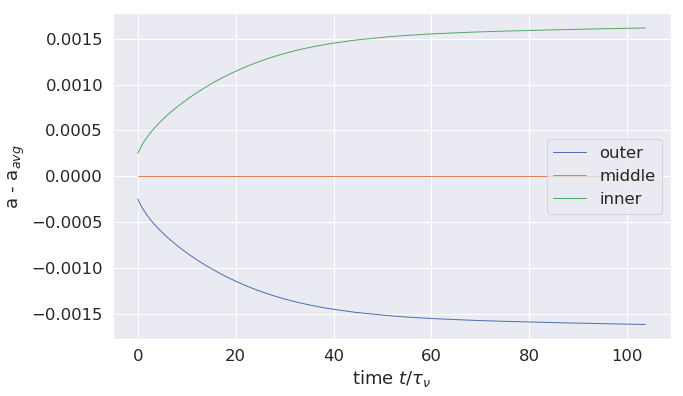

In [6]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = a_inner - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='outer')
y = a_avg - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='middle')
y = a_outer - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('a - a$_{avg}$')
p = plt.legend(loc='center right')

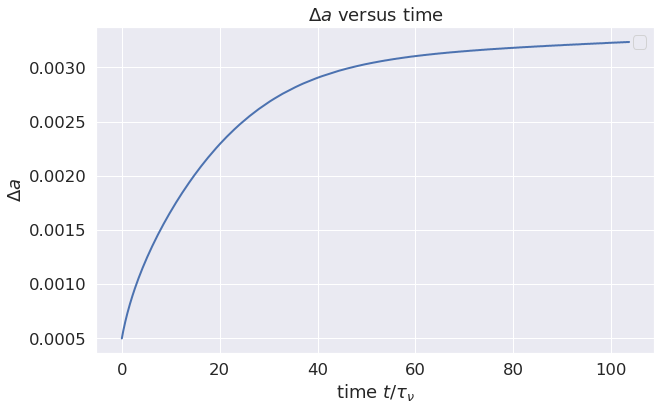

In [7]:
#plot delta_a versus time
x = times_viscous
y = delta_a
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_ylabel(r'$\Delta a$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

In [8]:
#compute delta_e=e_outer-e_inner and e_prime = a_mid*delta_e/delta_a versus time
e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
e_inner = e[:, 0, :].mean(axis=1)
e_avg = (e_inner + e_outer)/2
delta_e = e_outer - e_inner
e_prime = a_avg*delta_e/delta_a

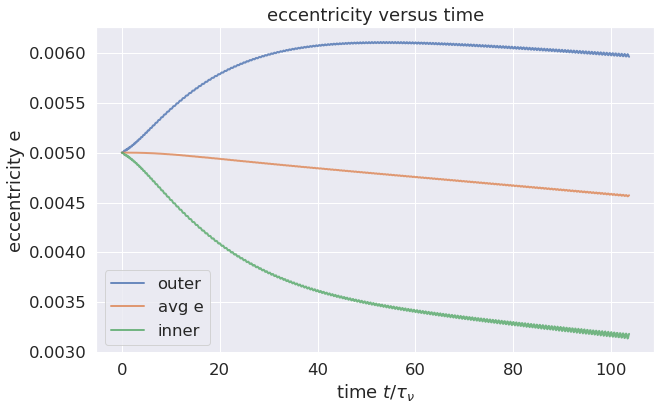

In [9]:
#plot streamline's e-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='avg e')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_title('eccentricity versus time')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

In [10]:
#compute inner streamline's periapse distance and outer streamline's apo
q_inner = a_inner*(1.0 - e_inner)
Q_outer = a_outer*(1.0 + e_inner)

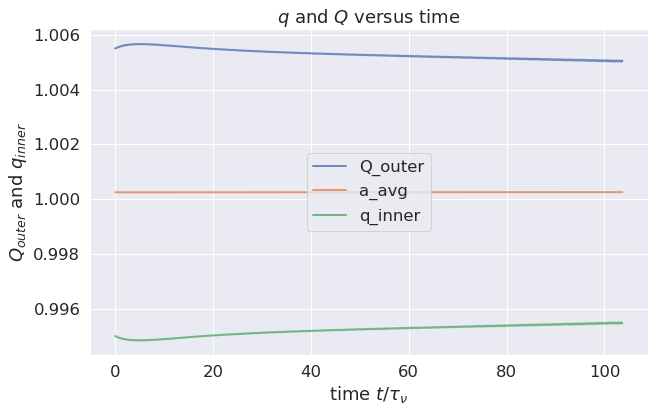

In [11]:
#plot streamline's qQ-evolution
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = Q_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='Q_outer')
y = a_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='a_avg')
y = q_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='q_inner')
p = ax.set_title('$q$ and $Q$ versus time')
p = ax.set_ylabel(r'$Q_{outer}$ and $q_{inner}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='center')

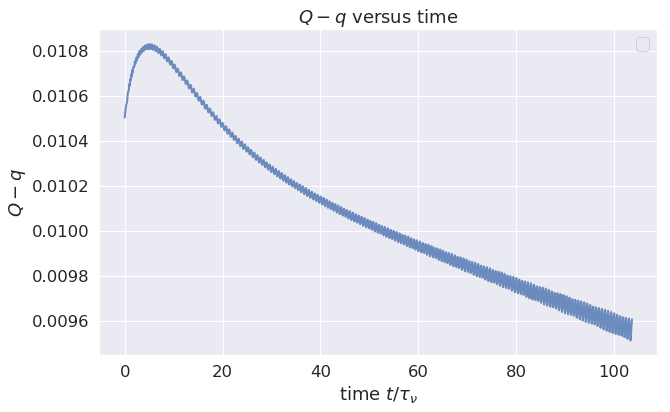

In [12]:
#plot streamline's Q-q
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = Q_outer - q_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8)
p = ax.set_title('$Q-q$ versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$Q-q$')
p = plt.legend()

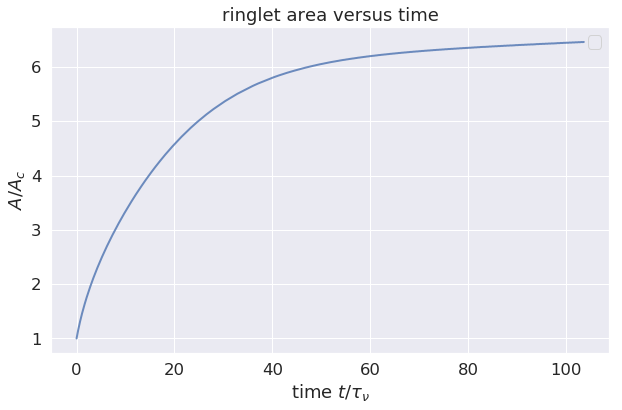

In [13]:
#plot ringlet area over time
area_outer = np.pi*(a_outer**2)*np.sqrt(1.0 - e_outer**2)
area_inner = np.pi*(a_inner**2)*np.sqrt(1.0 - e_inner**2)
area = area_outer - area_inner
area_circular = np.pi*(a_outer**2 - a_inner**2)
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = area/area_circular[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8)
p = ax.set_title('ringlet area versus time')
p = ax.set_ylabel(r'$A/A_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

In [14]:
#compute delta_w=wt_outer-wt_inner and wt_prime = a_mid*e_mid*delta_wt/delta_a 
#and q=sqrt(e_prime^2 + wt_prime^2) versus time
delta_wt_list = []
for t_idx in range(len(times)):
    s_idx = 0
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_inner = wt[t_idx, s_idx, theta_idx]
    s_idx = 1
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_outer = wt[t_idx, s_idx, theta_idx]
    delta_wt_list += [wt_outer - wt_inner]
delta_wt = adjust_angle(np.array(delta_wt_list))
wt_prime = a_avg*e_avg*delta_wt/delta_a
q = np.sqrt(e_prime**2 + wt_prime**2)

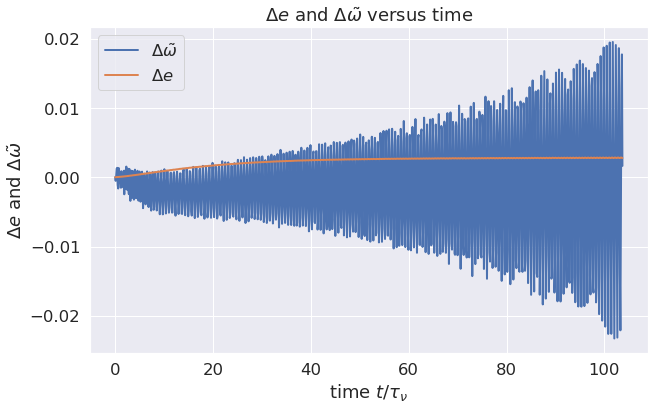

In [15]:
#plot delta_e and delta_wt versus time
x = times_viscous
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta\tilde{\omega}$')
y = delta_e
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e$')
p = ax.set_title(r'$\Delta e$ and $\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta e$ and $\Delta\tilde{\omega}$')
p = plt.legend()

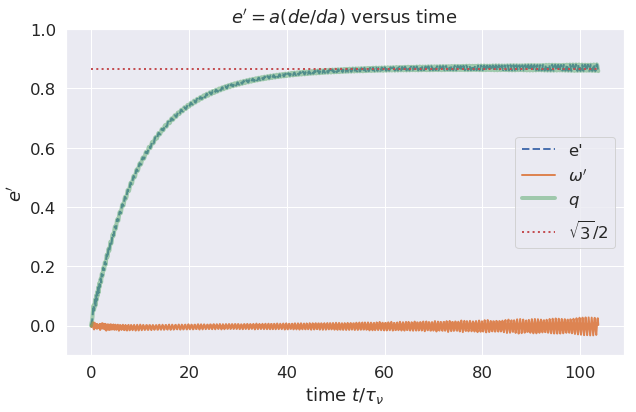

In [16]:
#plot e_prime wt_prime and q versus time
x = times_viscous
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='dashed', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r"$\omega'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=4, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'=a(de/da)$ versus time")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$e'$")
p = ax.set_ylim(-0.1, 1)
p = plt.legend()

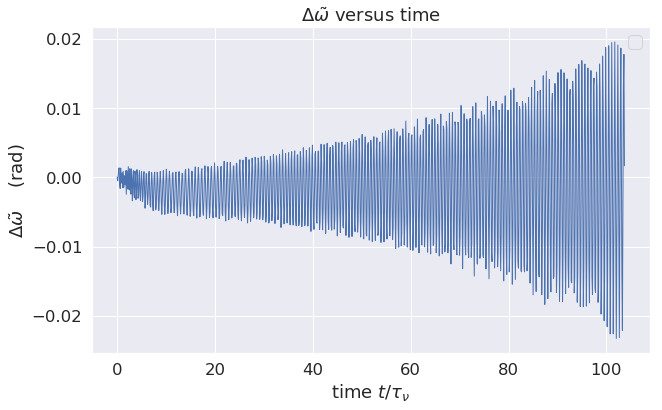

In [17]:
#plot delta_wt versus time
x = times_viscous
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

In [18]:
#angular momentum flux & luminosity vs time
c = -1.0
twopi = 2*np.pi
viscous_angular_momentum_luminosity_list = []
viscous_angular_momentum_flux_list = []
gravitational_angular_momentum_luminosity_list = []
print 'fast_gravity = ', fast_gravity
for t_idx in range(len(times)):
    G = -1.0
    nu = shear_viscosity
    Ar, At = accelerations(lambda0, G, nu, c, r[t_idx], t[t_idx], vr[t_idx], vt[t_idx], fast_gravity)
    angular_momentum_flux = lambda0*r[t_idx]*At
    viscous_angular_momentum_flux_list += [angular_momentum_flux]
    torque_per_particle = angular_momentum_flux*r[t_idx]/twopi
    viscous_angular_momentum_luminosity_list += [torque_per_particle[1].sum()]
    G = G_ring
    nu = -1.0
    Ar, At = accelerations(lambda0, G, nu, c, r[t_idx], t[t_idx], vr[t_idx], vt[t_idx], fast_gravity)
    angular_momentum_flux = lambda0*r[t_idx]*At
    torque_per_particle = angular_momentum_flux*r[t_idx]/twopi
    gravitational_angular_momentum_luminosity_list += [torque_per_particle[1].sum()]
viscous_angular_momentum_luminosity = np.array(viscous_angular_momentum_luminosity_list)
gravitational_angular_momentum_luminosity = np.array(gravitational_angular_momentum_luminosity_list)

fast_gravity =  True


In [19]:
#viscous angular momentum flux & luminosity assuming circular ring at time=0
a0 = a_avg[0]
area = twopi*a0*delta_a[0]
sd0 = total_ring_mass/area
w0 = Omega(J2, Rp, a0)
viscous_flux0 = 1.5*shear_viscosity*sd0*a0*w0
viscous_luminosity0 = viscous_flux0*twopi*a0
viscous_flux0, viscous_luminosity0, viscous_angular_momentum_luminosity[0]
print 'circular flux, luminosity = ', viscous_flux0, viscous_luminosity0, viscous_angular_momentum_luminosity[0], \
    gravitational_angular_momentum_luminosity[0]

circular flux, luminosity =  2.1518060185836455e-19 1.352357600885686e-18 1.0479083488221687e-18 -2.6363083736782264e-23


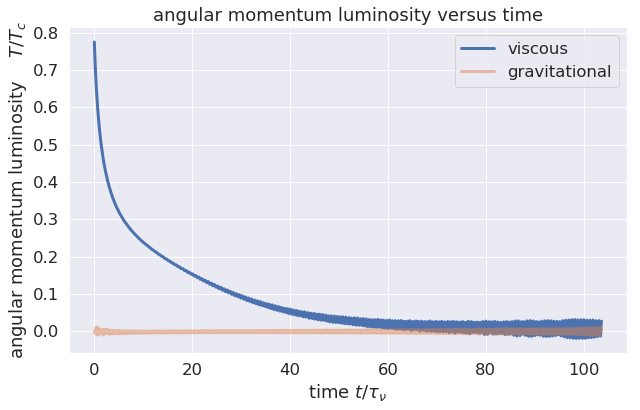

In [20]:
#plot viscous & gravitational angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_angular_momentum_luminosity/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=3, label='viscous')
y = gravitational_angular_momentum_luminosity/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=3, alpha=0.5, label='gravitational')
p = ax.set_title(r'angular momentum luminosity versus time')
p = ax.set_ylabel(r'angular momentum luminosity    $T/T_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()

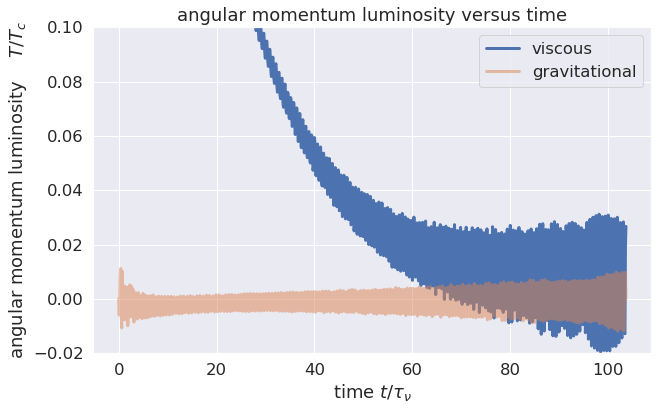

In [21]:
#plot viscous & gravitational angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_angular_momentum_luminosity/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=3, label='viscous')
y = gravitational_angular_momentum_luminosity/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=3, alpha=0.5, label='gravitational')
p = ax.set_title(r'angular momentum luminosity versus time')
p = ax.set_ylabel(r'angular momentum luminosity    $T/T_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(-0.02, 0.1)
p = ax.legend()

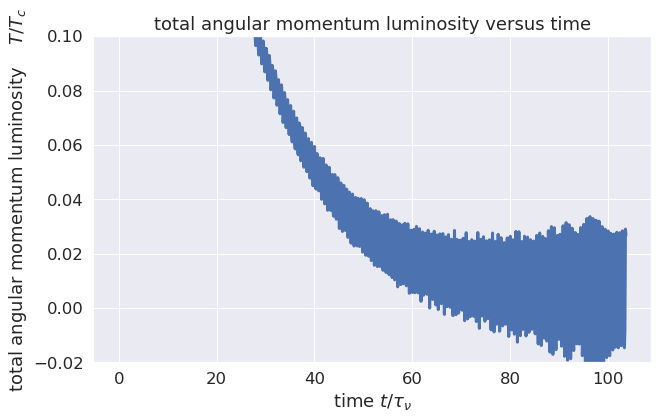

In [22]:
#plot total angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (viscous_angular_momentum_luminosity + gravitational_angular_momentum_luminosity)/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=3)
p = ax.set_title(r'total angular momentum luminosity versus time')
p = ax.set_ylabel(r'total angular momentum luminosity    $T/T_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(-0.02, 0.1)

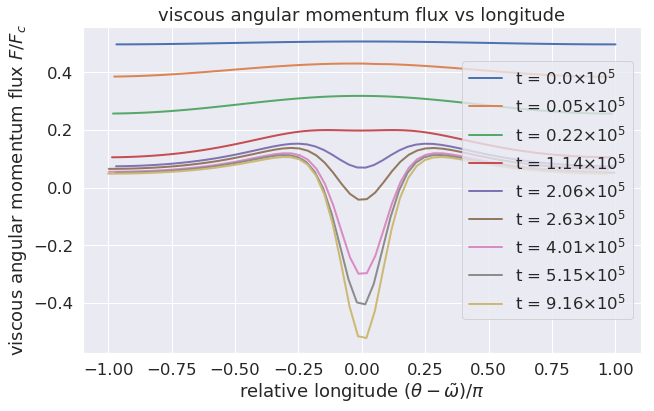

In [23]:
#viscous flux vs longitude
f, ax = plt.subplots(figsize=(10, 6))
t_idxs = (np.array([0.0, 0.005, 0.02, 0.1, 0.18, 0.23, 0.35, 0.45, 0.8])*total_number_of_outputs)\
    .astype(int)
for t_idx in t_idxs:
    viscous_flux = viscous_angular_momentum_flux_list[t_idx][1]
    r_outer = r[t_idx][1]
    t_outer = t[t_idx][1]
    wt_outer = wt[t_idx][1]
    pidx = r_outer.argmin()
    wt_outer_min = wt_outer[pidx]
    t_rotating = adjust_angle(t_outer - wt_outer_min)
    y = viscous_flux/viscous_flux0
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    N_orbits = times[t_idx]/twopi/1.0e5
    lbl = r't = ' + str(N_orbits)[0:4] + r'$\times10^5$'
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'viscous angular momentum flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'viscous angular momentum flux $F/F_c$')
p = plt.legend(loc='center right')